<a href="https://colab.research.google.com/github/alejandromunizsiques/Nuevo-repositorio/blob/main/Prueba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automobile Company Insurance Complaints

Your task is to create a detailed presentation to automobile insurance company investor executives that describes trends in insurance complaint ranking data to make data-driven business and investment decisions. They are particularly interested in learning about various automobile insurance companies and their trends in complaints.

The data is from the New York State Department of Financial Services (DFS):

"The DFS ranks automobile insurance companies doing business in New York State based on the number of consumer complaints upheld against them as a percentage of their total business over a two-year period. Complaints typically involve issues like delays in the payment of no-fault claims and nonrenewal of policies. Insurers with the fewest upheld complaints per million dollars of premiums appear at the top of the list. Those with the highest complaint ratios are ranked at the bottom." - ny.gov
The first step in this process is to use Python to clean the data to get it ready for analysis. You must:

Address the missing values in this dataset. Deal with these appropriately. . Include a brief description of the method you used to deal with missing values along with a justification for that method.
Ensure all columns match the data types listed in the data dictionary.
The next step is to complete an analysis based on the data using Python. This should include visualizations and an analysis of trends or any other insights you can gain from the data. You should include at least 3 useful and clear visualizations. Under each visualization, include a brief description of the insights gained from that data visualization.

The final step is to create a presentation that you could give to insurance investment executives. This should be a slidedeck (feel free to use any tool you would like - PowerPoint, Google Slides, etc.) with visualizations, insights, and recommendations to the executives.

Some questions you can explore include (but are not limited to):

What are the most common types of complaints?
What is the distribution of complaint ratios?
Do smaller companies have more complaints per customer than larger companies?
What are the companies with the lowest number of complaints? The highest?
What is the average number of complaints? Does this change year over year?
Are there trends in the data over time?
Is there a relationship between premiums written and complaints?

# Carga de liberias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install klib
!pip install --upgrade klib
import klib as klib
import numpy as np


     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Carga del dataset

In [3]:
seguros = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Pruebas Semana 1/auto-insurance-complaint-rankings.csv')


# Diccionario Dataset

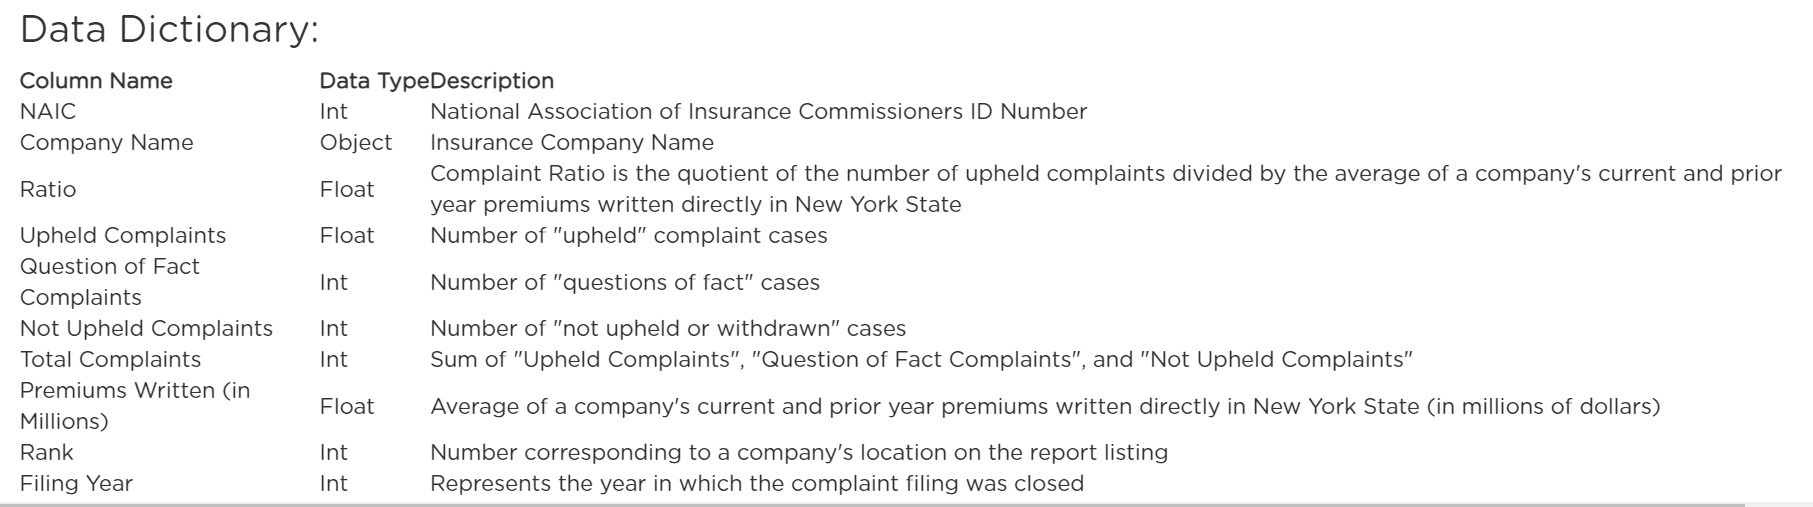

# Tabulacion de los datos


In [4]:
seguros.head()


,Unnamed: 0,NAIC,Company Name,Ratio,Upheld Complaints,Question of Fact Complaints,Not Upheld Complaints,Total Complaints,Premiums Written (in Millions),Rank,Filing Year
0,0,32786,Progressive Specialty Insurance Company,0.0,0.0,17,29,46,204.173,1,2016
1,1,19976,Amica Mutual Insurance Company,0.0,0.0,9,8,17,84.769,2,2016
2,2,25453,Nationwide Insurance Company of America,0.0,0.0,9,4,13,65.335,3,2016
3,3,15024,Preferred Mutual Insurance Company,0.0,0.0,3,2,5,62.505,4,2016
4,4,10052,Chubb National Insurance Company,0.0,0.0,1,2,3,46.735,5,2016


# Data Cleaning

In [5]:
# lo primero que se hace es eliminar la columna "  Unnamed: 0" puesto que no entrega ningun valor y ademas no esta especificado en nuestro diccionario

seguros_1 = seguros.drop(columns=["Unnamed: 0"])

# lo segundo es tratar con la variable "Upheld Complaints", como se tratan de solo 5 datos faltantes , simplemente se eliminaran las filas faltantes

seguros_1 = seguros_1.dropna()

# otra de las cosas para poder dejar el dataset igual a su diccionario es cambiar el DType de la variable "Filing Year" de objeto a int

filtro_1 = seguros_1["Filing Year"]== 'Twenty-Sixteen'
seguros_1["Filing Year"] = seguros_1["Filing Year"].replace('Twenty-Sixteen',2016)
seguros_1["Filing Year"] = seguros_1["Filing Year"].astype(int)
seguros_1.info()
seguros_1.nunique()

#debido a que varios valores se repiten a traves del año, se dividira la data por años y para algunas mediciones (mediciones sobre el tiempo) se mediran 




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1353 entries, 0 to 1357
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAIC                            1353 non-null   int64  
 1   Company Name                    1353 non-null   object 
 2   Ratio                           1353 non-null   float64
 3   Upheld Complaints               1353 non-null   float64
 4   Question of Fact Complaints     1353 non-null   int64  
 5   Not Upheld Complaints           1353 non-null   int64  
 6   Total Complaints                1353 non-null   int64  
 7   Premiums Written (in Millions)  1353 non-null   float64
 8   Rank                            1353 non-null   int64  
 9   Filing Year                     1353 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 116.3+ KB


NAIC                               219
Company Name                       223
Ratio                              605
Upheld Complaints                   44
Question of Fact Complaints         78
Not Upheld Complaints              109
Total Complaints                   134
Premiums Written (in Millions)    1187
Rank                               181
Filing Year                          8
dtype: int64

# Klib exploratory analisis of the data

In [6]:
klib.missingval_plot(seguros_1)

No missing values found in the dataset.


## Matriz de correlacion

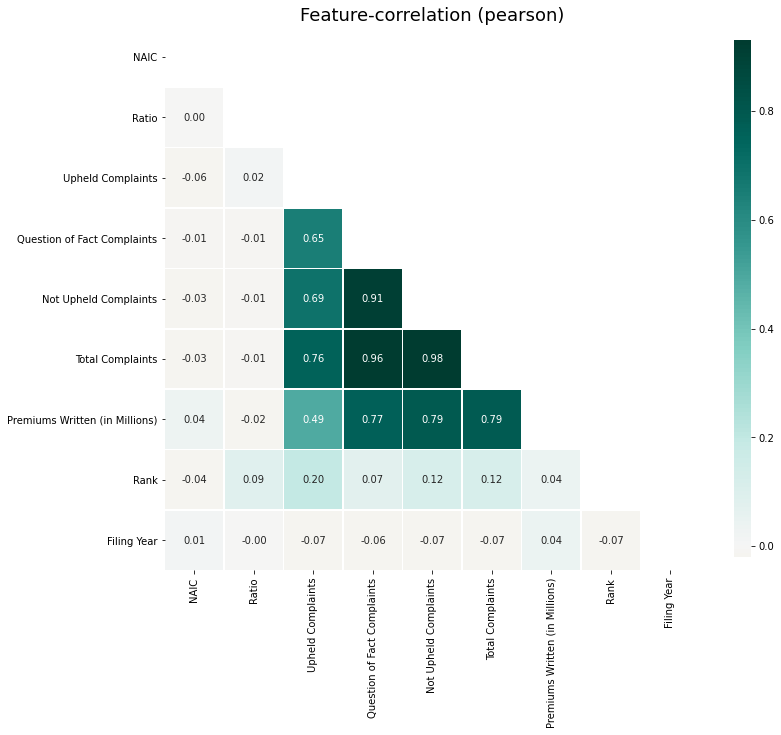

In [7]:
klib.corr_plot(seguros_1)

# Analisis de la data

## What are the most common types of complaints?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

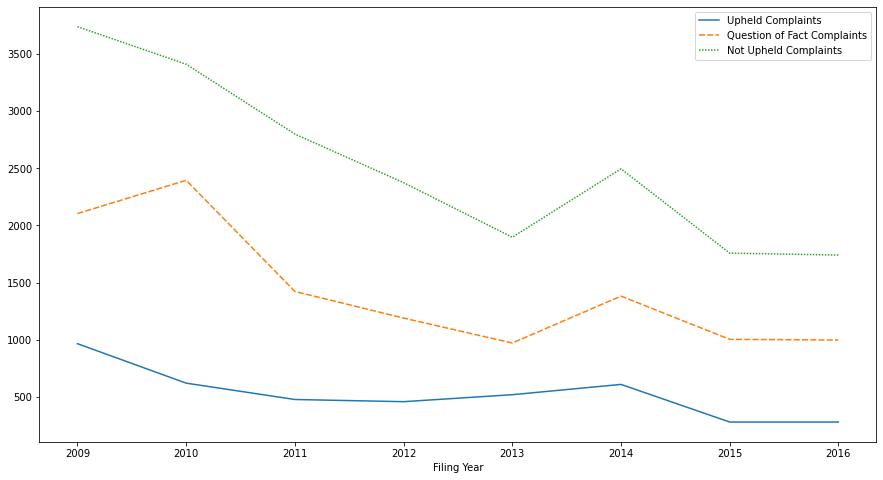

In [8]:
seguros_groupby3 = seguros_1.groupby(["Filing Year"])[["Upheld Complaints","Question of Fact Complaints","Not Upheld Complaints"]].sum()
plt.figure(figsize = (15,8))
sns.lineplot(data=seguros_groupby3)
plt.savefig('1.png', dpi = 300)
from google.colab import files
files.download('1.png')



##What is the distribution of complaint ratios?

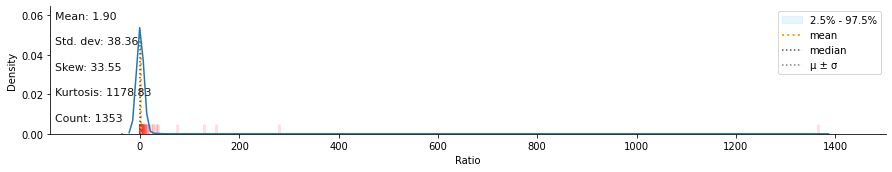

In [9]:
klib.dist_plot(seguros_1["Ratio"]) 

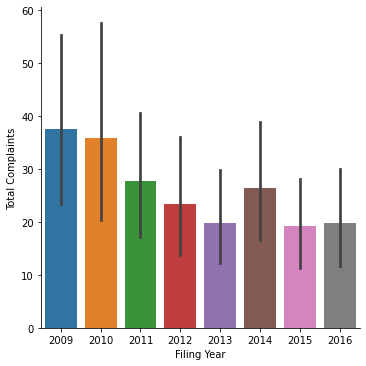

In [10]:
sns.catplot(x="Filing Year", y="Total Complaints", kind="bar",data=seguros_1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

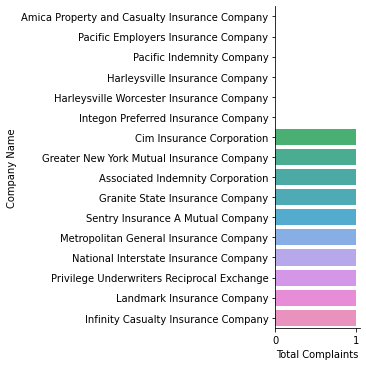

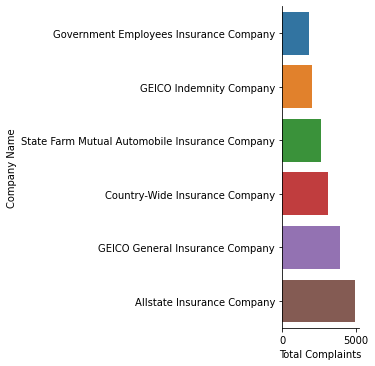

In [26]:
seguros_groupby1 = seguros_1.groupby(["Company Name"])[["Total Complaints"]].sum()
seguros_groupby1 = seguros_groupby1.sort_values("Total Complaints",axis=0, ascending=True)
filtro_complains_groupby = seguros_groupby1["Total Complaints"] < 1.1
seguros_groupby1_primeros = seguros_groupby1[filtro_complains_groupby]
filtro_complains_groupby_mayores = seguros_groupby1["Total Complaints"] > 1113
seguros_groupby1_ultimos = seguros_groupby1[filtro_complains_groupby_mayores]
sns.catplot(x="Total Complaints", y=seguros_groupby1_primeros.index, kind="bar", data=seguros_groupby1_primeros, )
sns.catplot(x="Total Complaints", y=seguros_groupby1_ultimos.index, kind="bar", data=seguros_groupby1_ultimos, )
plt.savefig('5.png', dpi = 300)
from google.colab import files
files.download('5.png')



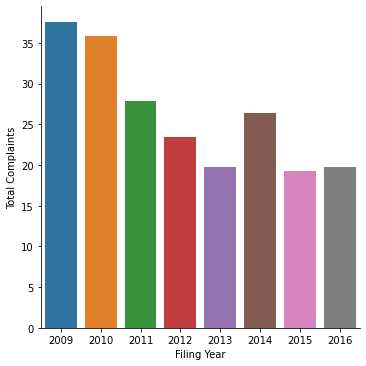

In [12]:
seguros_groupby2 = seguros_1.groupby(["Filing Year"])[["Total Complaints"]].mean()
sns.catplot(x=seguros_groupby2.index, y="Total Complaints", kind="bar",data=seguros_groupby2)


##Is there a relationship between premiums written and complaints?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

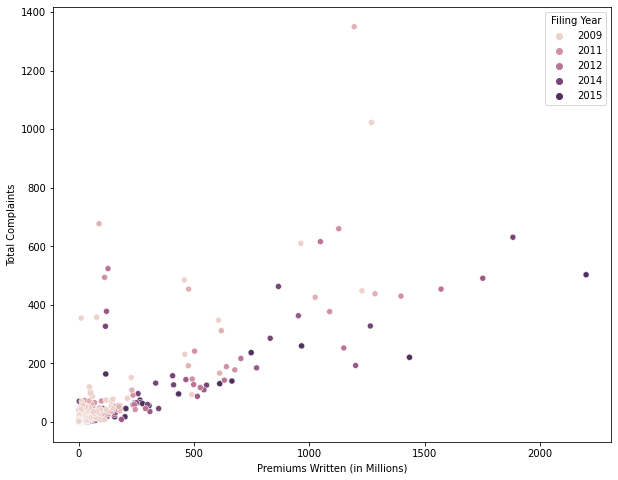

In [23]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "Premiums Written (in Millions)", y="Total Complaints",data=seguros_1,hue="Filing Year")
plt.savefig('2.png', dpi = 300)
from google.colab import files
files.download('2.png')


